# ОИАД. Лабораторная работа №2
## Вариант №9

In [33]:
import pandas as pd
import seaborn as sns
import numpy as np
import math
import matplotlib.pyplot as plt
from scipy import stats
from google.colab import drive

drive.mount('/content/drive', force_remount=True)

google_drive_path = '/content/drive/MyDrive/students_simple.csv'

try:
    student_data_df = pd.read_csv(google_drive_path)
    print("Файл загружен.")
except Exception as e:
    print(f"Ошибка: {e}")
    exit()

student_id_number = 9

first_col_index = student_id_number % 5
second_col_index = (student_id_number**2) % 5 + 5

first_variable_name = student_data_df.columns[first_col_index]
second_variable_name = student_data_df.columns[second_col_index]

print(f"Номер: {student_id_number}")
print(f"1: '{first_variable_name}' (индекс {first_col_index})")
print(f"2: '{second_variable_name}' (индекс {second_col_index})")

clean_data = student_data_df[[first_variable_name, second_variable_name]].dropna()

x_values = clean_data[first_variable_name].to_numpy()
y_values = clean_data[second_variable_name].to_numpy()

sample_size = len(x_values)
sample_size

Mounted at /content/drive
Файл загружен.
Номер: 9
1: 'pages' (индекс 4)
2: 'bmi' (индекс 6)


20

---
## ЗАДАНИЕ 1: РАСЧЕТ КОЭФФИЦИЕНТОВ КОРРЕЛЯЦИИ

In [34]:
def analyze_correlations(x_data, y_data):
    print("1. Коэффициент знаковой корреляции Фехнера")
    calculate_fechner_coefficient(x_data, y_data)

    print("\n2. Линейная корреляция Пирсона")
    calculate_pearson_coefficient(x_data, y_data)

    print("\n3. Ранговая корреляция Спирмена")
    calculate_spearman_coefficient(x_data, y_data)

    print("\n4. Ранговая корреляция Кендалла")
    calculate_kendall_coefficient(x_data, y_data)


def calculate_fechner_coefficient(x_vec, y_vec):
    x_deviations = x_vec - np.mean(x_vec)
    y_deviations = y_vec - np.mean(y_vec)

    x_signs = np.sign(x_deviations)
    y_signs = np.sign(y_deviations)

    agreements = np.sum((x_signs == y_signs) & (x_signs != 0) & (y_signs != 0))
    disagreements = np.sum((x_signs != y_signs) & (x_signs != 0) & (y_signs != 0))

    total_comparisons = agreements + disagreements

    if total_comparisons == 0:
        fechner_val = float('nan')
    else:
        fechner_val = (agreements - disagreements) / total_comparisons

    print(f"Значение коэффициента: {fechner_val:.4f}")
    print(f"Совпадений знаков (N+): {agreements}")
    print(f"Несовпадений знаков (N-): {disagreements}")


def calculate_pearson_coefficient(x_vec, y_vec, conf_level=0.95):
    r_val, p_val = stats.pearsonr(x_vec, y_vec)
    n_obs = len(x_vec)

    print(f"Коэффициент (r): {r_val:.4f}")
    print(f"P-значение (значимость): {p_val:.4g}")

    r_z_transformed = np.arctanh(r_val)
    se = 1.0 / np.sqrt(n_obs - 3)

    z_critical = stats.norm.ppf(1 - (1 - conf_level) / 2)

    ci_low_z = r_z_transformed - z_critical * se
    ci_high_z = r_z_transformed + z_critical * se

    ci_low, ci_high = np.tanh([ci_low_z, ci_high_z])

    print(f"{int(conf_level*100)}% доверительный интервал: [{ci_low:.4f}, {ci_high:.4f}]")


def calculate_spearman_coefficient(x_vec, y_vec):
    rho_val, p_val = stats.spearmanr(x_vec, y_vec)
    print(f"Коэффициент (ρ): {rho_val:.4f}")
    print(f"P-значение (значимость): {p_val:.4g}")


def calculate_kendall_coefficient(x_vec, y_vec):
    tau_val, p_val = stats.kendalltau(x_vec, y_vec)
    print(f"Коэффициент (τ): {tau_val:.4f}")
    print(f"P-значение (значимость): {p_val:.4g}")

if 'x_values' in locals() and 'y_values' in locals():
    analyze_correlations(x_values, y_values)
else:
    print("x_values и y_values не были определены в предыдущем блоке.")

1. Коэффициент знаковой корреляции Фехнера
Значение коэффициента: -0.4000
Совпадений знаков (N+): 6
Несовпадений знаков (N-): 14

2. Линейная корреляция Пирсона
Коэффициент (r): -0.1795
P-значение (значимость): 0.4489
95% доверительный интервал: [-0.5762, 0.2857]

3. Ранговая корреляция Спирмена
Коэффициент (ρ): -0.3239
P-значение (значимость): 0.1635

4. Ранговая корреляция Кендалла
Коэффициент (τ): -0.2442
P-значение (значимость): 0.1538


### Вывод по корреляционному анализу
Все рассчитанные коэффициенты показывают слабую отрицательную связь между переменными. Однако, ни один из них не является статистически значимым, так как P-value для всех тестов значительно выше 0.05. Несмотря на слабую тенденцию в данных, статистически значимая корреляция отсутствует. Наблюдаемая связь, скорее всего, случайна.

---
## ЗАДАНИЕ 2: ВИЗУАЛИЗАЦИЯ ДАННЫХ

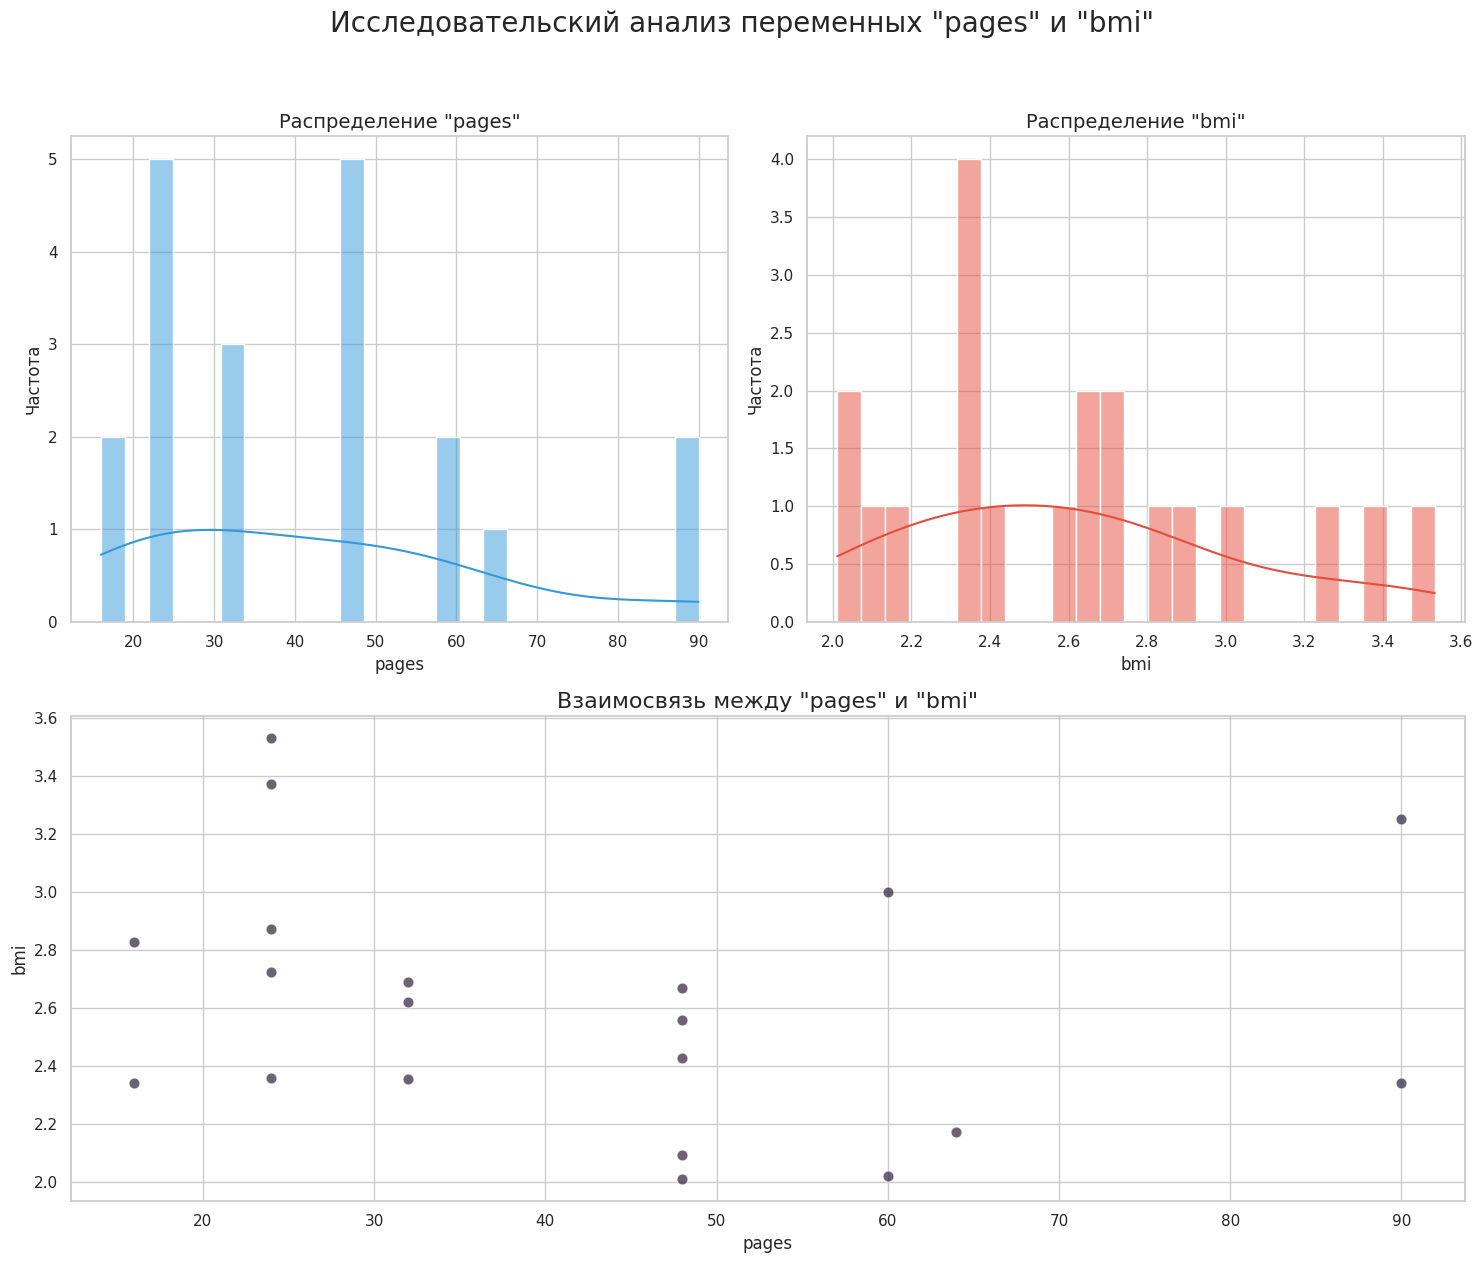

In [35]:
def create_visual_analysis(x_data, y_data, x_name, y_name):
    sns.set_theme(style="whitegrid", palette="mako")
    plt.figure(figsize=(15, 13))
    main_title = f'Исследовательский анализ переменных "{x_name}" и "{y_name}"'
    plt.suptitle(main_title, fontsize=20, y=0.97)

    ax1 = plt.subplot(2, 2, 1)
    sns.histplot(x=x_data, kde=True, ax=ax1, bins=25, color="#3498db")
    ax1.set_title(f'Распределение "{x_name}"', fontsize=14)
    ax1.set_xlabel(x_name, fontsize=12)
    ax1.set_ylabel('Частота', fontsize=12)

    ax2 = plt.subplot(2, 2, 2)
    sns.histplot(x=y_data, kde=True, ax=ax2, bins=25, color="#e74c3c")
    ax2.set_title(f'Распределение "{y_name}"', fontsize=14)
    ax2.set_xlabel(y_name, fontsize=12)
    ax2.set_ylabel('Частота', fontsize=12)

    ax3 = plt.subplot(2, 1, 2)
    sns.scatterplot(x=x_data, y=y_data, ax=ax3, s=60, alpha=0.7, edgecolor='w')
    ax3.set_title(f'Взаимосвязь между "{x_name}" и "{y_name}"', fontsize=16)
    ax3.set_xlabel(x_name, fontsize=12)
    ax3.set_ylabel(y_name, fontsize=12)

    plt.tight_layout(rect=[0, 0, 1, 0.94])
    plt.show()

create_visual_analysis(x_values, y_values, first_variable_name, second_variable_name)

### Вывод по визуализации
Отсутствие четкой структуры на диаграмме рассеяния является слабым визуальным доказательством того, что между количеством прочитанных страниц и индексом массы тела студентов нет значимой связи.

---
## ЗАДАНИЕ 3: ПОСТРОЕНИЕ УРАВНЕНИЙ РЕГРЕССИИ

Сводка по регрессионным моделям:
Модель: Линейная        | R^2 = 0.03222   | Коэффициенты: w0=2.765, w1=-0.004
Модель: Квадратичная    | R^2 = 0.18298   | Коэффициенты: w0=3.452, w1=-0.037, w2=0.000
Модель: Гиперболическая | R^2 = 0.06699   | Коэффициенты: w0=2.392, w1=7.341
Модель: Показательная   | R^2 = 0.03461   | Коэффициенты: w0=2.744, w1=-0.001


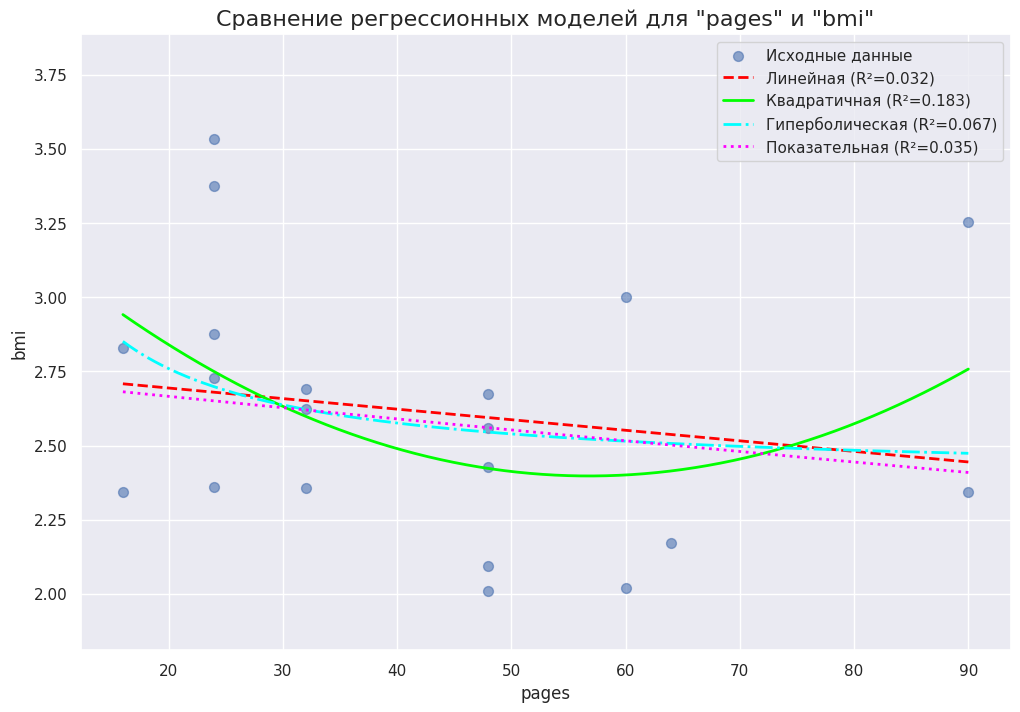

In [44]:
regression_results = {}

params_lin = np.polyfit(x_values, y_values, 1)
model_lin = np.poly1d(params_lin)
y_pred_lin = model_lin(x_values)
r2_lin = np.corrcoef(y_values, y_pred_lin)[0, 1]**2
regression_results['Линейная'] = {'model': model_lin, 'r2': r2_lin, 'params': params_lin}

params_quad = np.polyfit(x_values, y_values, 2)
model_quad = np.poly1d(params_quad)
y_pred_quad = model_quad(x_values)
r2_quad = np.corrcoef(y_values, y_pred_quad)[0, 1]**2
regression_results['Квадратичная'] = {'model': model_quad, 'r2': r2_quad, 'params': params_quad}


mask_hyp = x_values != 0
x_inv = 1 / x_values[mask_hyp]
params_hyp = np.polyfit(x_inv, y_values[mask_hyp], 1)
model_hyp = np.poly1d(params_hyp)
y_pred_hyp = model_hyp(1 / x_values[mask_hyp])
r2_hyp = np.corrcoef(y_values[mask_hyp], y_pred_hyp)[0, 1]**2
regression_results['Гиперболическая'] = {'model': model_hyp, 'r2': r2_hyp, 'params': params_hyp}

mask_exp = y_values > 0
log_y = np.log(y_values[mask_exp])
params_exp_log = np.polyfit(x_values[mask_exp], log_y, 1)
w1_exp, log_w0_exp = params_exp_log
w0_exp = np.exp(log_w0_exp)
y_pred_exp = w0_exp * np.exp(w1_exp * x_values[mask_exp])
r2_exp = np.corrcoef(y_values[mask_exp], y_pred_exp)[0, 1]**2
regression_results['Показательная'] = {'w0': w0_exp, 'w1': w1_exp, 'r2': r2_exp}


print("Сводка по регрессионным моделям:")
for name, data in regression_results.items():
    r2_info = f"R^2 = {data['r2']:.5f}"
    if 'params' in data:
        params_info = ", ".join([f"w{i}={p:.3f}" for i, p in enumerate(reversed(data['params']))])
    else:
        params_info = f"w0={data['w0']:.3f}, w1={data['w1']:.3f}"
    print(f"Модель: {name:<15} | {r2_info:<15} | Коэффициенты: {params_info}")

sns.set_theme(style="darkgrid")
plt.figure(figsize=(12, 8))

plt.scatter(x_values, y_values, alpha=0.6, label='Исходные данные', s=50)

x_smooth = np.linspace(min(x_values), max(x_values), 400)

plt.plot(x_smooth, regression_results['Линейная']['model'](x_smooth),
         label=f"Линейная (R²={regression_results['Линейная']['r2']:.3f})",
         linestyle='--', color='red', linewidth=2)

plt.plot(x_smooth, regression_results['Квадратичная']['model'](x_smooth),
         label=f"Квадратичная (R²={regression_results['Квадратичная']['r2']:.3f})",
         linestyle='-', color='lime', linewidth=2)

x_smooth_hyp = x_smooth[x_smooth != 0]
plt.plot(x_smooth_hyp, regression_results['Гиперболическая']['model'](1/x_smooth_hyp),
         label=f"Гиперболическая (R²={regression_results['Гиперболическая']['r2']:.3f})",
         linestyle='-.', color='cyan', linewidth=2)

w0, w1 = regression_results['Показательная']['w0'], regression_results['Показательная']['w1']
plt.plot(x_smooth, w0 * np.exp(w1 * x_smooth),
         label=f"Показательная (R²={regression_results['Показательная']['r2']:.3f})",
         linestyle=':', color='magenta', linewidth=2)

plt.title(f'Сравнение регрессионных моделей для "{first_variable_name}" и "{second_variable_name}"', fontsize=16)
plt.xlabel(first_variable_name, fontsize=12)
plt.ylabel(second_variable_name, fontsize=12)
plt.legend(fontsize=11)
plt.ylim(np.min(y_values) * 0.9, np.max(y_values) * 1.1)
plt.show()

### Вывод по регрессионному анализу
Отсутствие модели со сколько-нибудь приемлемым значением R² является доказательством того, что между рассматриваемыми переменными нет значимой функциональной зависимости, которую можно было бы описать с помощью данных уравнений регрессии.

---
## ЗАДАНИЕ 4: ПРОВЕРКА ЗНАЧИМОСТИ МОДЕЛЕЙ ПО F-КРИТЕРИЮ ФИШЕРА

In [51]:
def run_f_test_on_selected_models(results, best_model_name, worst_model_name, full_n, alpha=0.05):
    print("Результаты F-теста для оценки значимости моделей:")

    models_to_test = {
        f"Наилучшая ('{best_model_name}')": results[best_model_name],
        f"Наихудшая ('{worst_model_name}')": results[worst_model_name]
    }

    for label, data in models_to_test.items():
        print(f"\nПроверка модели: {label}")

        r2 = data['r2']
        k = len(data.get('params', [0, 0]))

        df_model = k - 1
        df_error = full_n - k

        if df_model <= 0 or df_error <= 0 or r2 >= 1:
            print("Некорректные параметры для F-теста.\n")
            continue

        f_stat = (r2 / df_model) / ((1 - r2) / df_error)
        p_value = stats.f.sf(f_stat, df_model, df_error)
        f_critical = stats.f.ppf(1 - alpha, df_model, df_error)

        print(f"F-статистика = {f_stat:.4f} (p-value = {p_value:.4f})")
        print(f"Критическое значение F (при alpha={alpha}) = {f_critical:.4f}")

        if p_value < alpha:
            print(f"ВЫВОД: Модель является статистически значимой.")
        else:
            print(f"ВЫВОД: Модель НЕ является статистически значимой.")\

r2_values = {name: data['r2'] for name, data in regression_results.items() if len(data.get('params', [0, 0])) > 0}
best_model = max(r2_values, key=r2_values.get)
worst_model = min(r2_values, key=r2_values.get)

run_f_test_on_selected_models(regression_results,
                              best_model_name=best_model,
                              worst_model_name=worst_model,
                              full_n=sample_size)

Результаты F-теста для оценки значимости моделей:

Проверка модели: Наилучшая ('Квадратичная')
F-статистика = 1.9036 (p-value = 0.1795)
Критическое значение F (при alpha=0.05) = 3.5915
ВЫВОД: Модель НЕ является статистически значимой.

Проверка модели: Наихудшая ('Линейная')
F-статистика = 0.5993 (p-value = 0.4489)
Критическое значение F (при alpha=0.05) = 4.4139
ВЫВОД: Модель НЕ является статистически значимой.


### Вывод по F-тесту

Проверка подтверждает, что ни одна из построенных моделей не может считаться адекватной для описания данных. Тот факт, что даже наилучшая модель провалила тест, является доказательством отсутствия значимой функциональной зависимости между переменными.